In [1]:
#import pandas as pd
#import seaborn as sns
import numpy as np

import cv2 #pip install opencv
import PIL.Image as Image #pip install pillow
import tensorflow as tf
#import tensorflow_hub as hub
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report, accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dest_dir = "F:/Research/Monkeypox_dataset/"
dest_dir

'F:/Research/Monkeypox_dataset/'

In [3]:
import pathlib

dest_dir = pathlib.Path(dest_dir)
dest_dir

WindowsPath('F:/Research/Monkeypox_dataset')

In [4]:
image_dic={
    'Chickenpox': list(dest_dir.glob('Chickenpox/*')),
    'Measles': list(dest_dir.glob('Measles/*')),
    'Monkeypox': list(dest_dir.glob('Monkeypox/*')),
    'Normal': list(dest_dir.glob('Normal/*'))
}

In [5]:
image_labels={
    'Chickenpox': 0,
    'Measles': 1,
    'Monkeypox': 2,
    'Normal': 3
}

In [6]:
print(len(image_dic['Chickenpox']))
print(len(image_dic['Measles']))
print(len(image_dic['Monkeypox']))
print(len(image_dic['Normal']))

107
91
279
293


In [7]:
X, y = [], []

for image_name, images in image_dic.items():
    for image in images:
        img_array = cv2.imread(str(image))
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(RGB_img,(256,256))
        X.append(resized_img)
        y.append(image_labels[image_name])

In [8]:
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((770, 256, 256, 3), (770,))

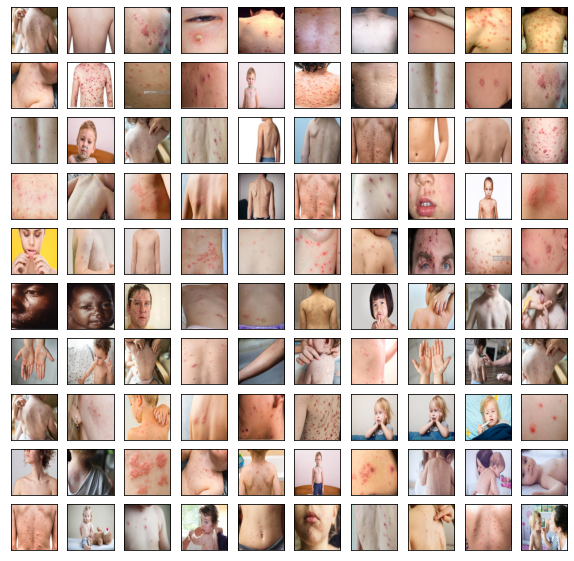

In [9]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
plt.show()

In [10]:
unique, counts = np.unique(y, return_counts=True)

dict(zip(unique, counts))

{0: 107, 1: 91, 2: 279, 3: 293}

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [12]:
unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0: 82, 1: 78, 2: 214, 3: 242}

In [13]:
unique, counts = np.unique(y_test, return_counts=True)

dict(zip(unique, counts))

{0: 25, 1: 13, 2: 65, 3: 51}

In [14]:
X_train.shape, y_train.shape

((616, 256, 256, 3), (616,))

In [15]:
X_test.shape, y_test.shape

((154, 256, 256, 3), (154,))

In [16]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [17]:
img_shape = X_train.shape[1:]
print(img_shape)

(256, 256, 3)


In [18]:
base_model = tf.keras.applications.ResNet101(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape
)

In [19]:
base_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block7_out[0][0]']       
                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block8_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block8_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block8_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block8_1_relu[0][0]']    
          

                                )                                                                 
                                                                                                  
 conv4_block11_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block10_out[0][0]']      
                                                                                                  
 conv4_block11_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block11_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block13_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block13_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block14_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block13_out[0][0]']      
                                                                                                  
 conv4_block14_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block14_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block14_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block16_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block17_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block16_out[0][0]']      
                                                                                                  
 conv4_block17_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block17_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block17_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block17_1_bn[0][0]']     
 on)      

                                )                                 'conv4_block19_3_bn[0][0]']     
                                                                                                  
 conv4_block19_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block19_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block19_out[0][0]']      
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block22_add (Add)        (None, 16, 16, 1024  0           ['conv4_block21_out[0][0]',      
                                )                                 'conv4_block22_3_bn[0][0]']     
                                                                                                  
 conv4_block22_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block22_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block22_out[0][0]']      
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
          

 conv5_block2_3_bn (BatchNormal  (None, 8, 8, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 8, 8, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block2_add[0][0]']       
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block2_out[0][0]']       
                                                                                                  
 conv5_blo

In [20]:
base_model.trainable = False

In [21]:
resnet101_freeze = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(4, activation='softmax')
])

In [22]:
resnet101_freeze.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 8, 8, 2048)        42658176  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 42,666,372
Trainable params: 8,196
Non-trainable params: 42,658,176
_________________________________________________________________


In [23]:
resnet101_freeze.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(
                          from_logits=False,
                          name='sparse_categorical_crossentropy'),
             metrics = ['accuracy'])

In [24]:
history = resnet101_freeze.fit(X_train_scaled, y_train, batch_size=16, verbose=2, epochs=150, validation_split=0.1) #validation_data=(X_test_scaled, y_test)

Epoch 1/150
35/35 - 47s - loss: 1.2906 - accuracy: 0.3628 - val_loss: 1.3128 - val_accuracy: 0.3065 - 47s/epoch - 1s/step
Epoch 2/150
35/35 - 43s - loss: 1.2129 - accuracy: 0.5126 - val_loss: 1.2461 - val_accuracy: 0.5000 - 43s/epoch - 1s/step
Epoch 3/150
35/35 - 44s - loss: 1.1829 - accuracy: 0.4874 - val_loss: 1.2171 - val_accuracy: 0.5000 - 44s/epoch - 1s/step
Epoch 4/150
35/35 - 44s - loss: 1.1552 - accuracy: 0.5271 - val_loss: 1.2231 - val_accuracy: 0.5484 - 44s/epoch - 1s/step
Epoch 5/150
35/35 - 44s - loss: 1.1562 - accuracy: 0.5289 - val_loss: 1.2398 - val_accuracy: 0.5000 - 44s/epoch - 1s/step
Epoch 6/150
35/35 - 44s - loss: 1.1304 - accuracy: 0.5668 - val_loss: 1.2644 - val_accuracy: 0.5000 - 44s/epoch - 1s/step
Epoch 7/150
35/35 - 43s - loss: 1.1168 - accuracy: 0.5596 - val_loss: 1.2373 - val_accuracy: 0.5484 - 43s/epoch - 1s/step
Epoch 8/150
35/35 - 44s - loss: 1.1227 - accuracy: 0.5487 - val_loss: 1.2121 - val_accuracy: 0.5000 - 44s/epoch - 1s/step
Epoch 9/150
35/35 - 45s 

Epoch 68/150
35/35 - 43s - loss: 0.9775 - accuracy: 0.6119 - val_loss: 1.1645 - val_accuracy: 0.5000 - 43s/epoch - 1s/step
Epoch 69/150
35/35 - 43s - loss: 0.9625 - accuracy: 0.6155 - val_loss: 1.1179 - val_accuracy: 0.5323 - 43s/epoch - 1s/step
Epoch 70/150
35/35 - 43s - loss: 0.9836 - accuracy: 0.6101 - val_loss: 1.1202 - val_accuracy: 0.5323 - 43s/epoch - 1s/step
Epoch 71/150
35/35 - 43s - loss: 1.0051 - accuracy: 0.5848 - val_loss: 1.1477 - val_accuracy: 0.5161 - 43s/epoch - 1s/step
Epoch 72/150
35/35 - 43s - loss: 0.9772 - accuracy: 0.6101 - val_loss: 1.1485 - val_accuracy: 0.5161 - 43s/epoch - 1s/step
Epoch 73/150
35/35 - 43s - loss: 0.9677 - accuracy: 0.6336 - val_loss: 1.0841 - val_accuracy: 0.5645 - 43s/epoch - 1s/step
Epoch 74/150
35/35 - 43s - loss: 0.9542 - accuracy: 0.6173 - val_loss: 1.1643 - val_accuracy: 0.5968 - 43s/epoch - 1s/step
Epoch 75/150
35/35 - 43s - loss: 0.9604 - accuracy: 0.6336 - val_loss: 1.1179 - val_accuracy: 0.5323 - 43s/epoch - 1s/step
Epoch 76/150
35/

Epoch 135/150
35/35 - 45s - loss: 0.9224 - accuracy: 0.6444 - val_loss: 1.1007 - val_accuracy: 0.5806 - 45s/epoch - 1s/step
Epoch 136/150
35/35 - 44s - loss: 0.9099 - accuracy: 0.6300 - val_loss: 1.0943 - val_accuracy: 0.5484 - 44s/epoch - 1s/step
Epoch 137/150
35/35 - 45s - loss: 0.9091 - accuracy: 0.6408 - val_loss: 1.1185 - val_accuracy: 0.5645 - 45s/epoch - 1s/step
Epoch 138/150
35/35 - 44s - loss: 0.9002 - accuracy: 0.6390 - val_loss: 1.1360 - val_accuracy: 0.5161 - 44s/epoch - 1s/step
Epoch 139/150
35/35 - 44s - loss: 0.8939 - accuracy: 0.6354 - val_loss: 1.1819 - val_accuracy: 0.5000 - 44s/epoch - 1s/step
Epoch 140/150
35/35 - 44s - loss: 0.9154 - accuracy: 0.6408 - val_loss: 1.0915 - val_accuracy: 0.6129 - 44s/epoch - 1s/step
Epoch 141/150
35/35 - 44s - loss: 0.9083 - accuracy: 0.6426 - val_loss: 1.1582 - val_accuracy: 0.5000 - 44s/epoch - 1s/step
Epoch 142/150
35/35 - 44s - loss: 0.9054 - accuracy: 0.6336 - val_loss: 1.2122 - val_accuracy: 0.4677 - 44s/epoch - 1s/step
Epoch 14

In [25]:
resnet101_freeze.evaluate(X_test_scaled, y_test)

5/5 [==============================] - 10s 2s/step - loss: 1.0158 - accuracy: 0.5714


[1.0158464908599854, 0.5714285969734192]

Text(0.5, 1.0, 'Training and Validation Accuracy')

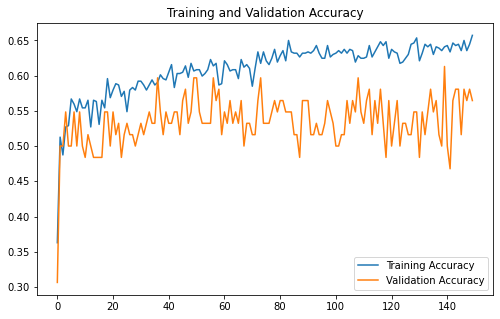

In [26]:
epochs = 150
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


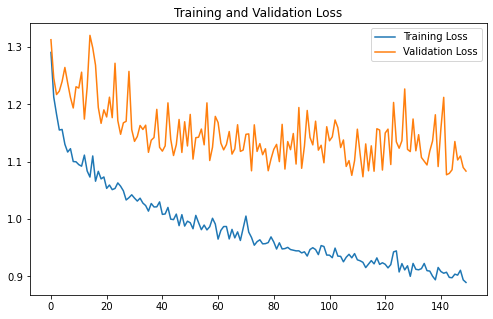

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report, accuracy_score, classification_report

y_pred = resnet101_freeze.predict(X_test_scaled) #### 3-dimentional

y_pred1 = np.array(list(map(lambda x: np.argmax(x), y_pred))) #pred_prob = np.argmax(y_pred, axis=1) ## 1-dimentional
    
clr = classification_report(y_test, y_pred1)
    
print(clr)

5/5 [==============================] - 11s 2s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        13
           2       0.54      0.74      0.62        65
           3       0.62      0.78      0.69        51

    accuracy                           0.57       154
   macro avg       0.29      0.38      0.33       154
weighted avg       0.43      0.57      0.49       154



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 0  0 20  5]
 [ 0  0 10  3]
 [ 0  0 48 17]
 [ 0  0 11 40]]


'sns.heatmap(cmRF, annot=True, fmt=\'d\')\nplt.xlabel("Predicted")\nplt.ylabel("Actual")\nplt.title("Confusion Matrix")'

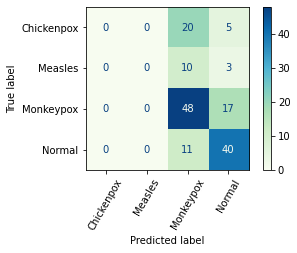

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

cmRF = confusion_matrix(y_test, y_pred1)
print(cmRF)

display_cm = ConfusionMatrixDisplay(cmRF, display_labels=image_labels.keys())
fig,ax = plt.subplots(figsize=(5,3))
display_cm.plot(cmap='GnBu', ax=ax, xticks_rotation=60)

'''sns.heatmap(cmRF, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")'''


In [30]:
y_pred = resnet101_freeze.predict(X_test_scaled)

from sklearn.metrics import roc_curve, auc
import sklearn

sklearn.metrics.roc_auc_score(y_test, y_pred, multi_class='ovr')

5/5 [==============================] - 10s 2s/step


0.7844264700144172

In [31]:
from tensorflow.keras.utils import to_categorical
y_test_cat = tf.keras.utils.to_categorical(y_test)
y_test_cat

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],


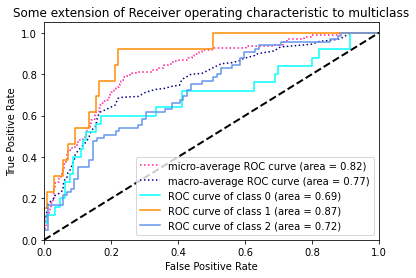

In [32]:
n_classes=3
 
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


lw=2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
from itertools import cycle
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle="dotted",
    linewidth=1.5,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="dotted",
    linewidth=1.5,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1.5,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [33]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred1)

0.3045977011494253

In [34]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

1.0158464226678208

In [35]:
resnet101_freeze.save("Saved Models/resnet101 + freeze.h5")